# Lab 10

## I. Hill Climbing


The Hill Climbing Method is a simple optimization algorithm that tries to find the optimal solution to a problem by iteratively improving the current solution. It is a local search algorithm, which means that it only considers the solutions that are in the neighborhood of the current solution.

Here's how the Hill Climbing Method works:

1. Start with an initial state -- a candidate to the solution of the problem.

2. Evaluate the current state to determine its quality or fitness.

3. Generate a set of neighboring states by making small modifications to the current one.

3. Evaluate the fitness of each neighboring state.

4. Select the best neighboring state and make it the new current one.

5. Repeat steps 3 to 5 until no further improvement can be made or a predefined stopping criterion is met.

One of the main advantages of the Hill Climbing Method is its simplicity and ease of implementation. 

Consider the Bukin funcion N6, from the basic optimisation benchmark set:

$$f(x,y) =  100 \sqrt{|y-0.01 x^2|}+ 0.01 |x+10|.$$

For $-15 \leqq x \leqq -5$ and $-3 \leqq y \leqq 3$ we have a minimum point $f(-10, 1) = 0$.


*Ex. 1:*

Implement a function $f$ for this function and represent it graphic using matplotlib.

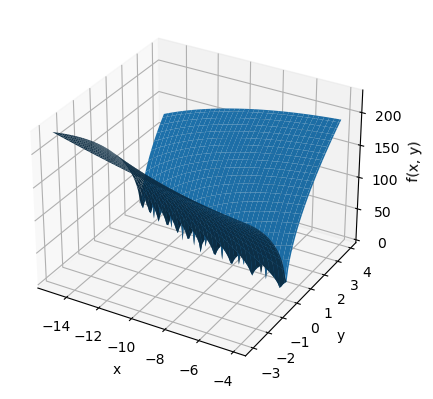

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def bukin(x, y):
    return 100 * np.sqrt(np.abs(y - 0.01 * x**2)) + 0.01 * np.abs(x + 10)

from mpl_toolkits.mplot3d import Axes3D
x = np.arange(-15, -4, 0.1)
y = np.arange(-3, 4, 0.1)

# Generate a grid of values for x and y
X, Y = np.meshgrid(x, y)

# Evaluate the function for each combination of x and y
Z = bukin(X, Y)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, Z)

# Set the labels for the axes
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')

# Show the plot
plt.show()


*Ex. 2:* 

Write a Hill Climbing algorithm that finds this functions minimum.

Hints: 

define a state, define a neighbour, choose a proper stop criteria before implementing the algorithm.

In [3]:
def initial_state():
    x = np.random.uniform(-15, -5)
    y = np.random.uniform(-3, 3)
    return (x, y)

# Define a function to generate a random neighboring state
def neighbor(state):
    x, y = state
    dx = np.random.uniform(-0.5, 0.5)
    dy = np.random.uniform(-0.5, 0.5)
    return (x + dx, y + dy)

# Define the Hill Climbing algorithm
def hill_climbing():
    # Generate an initial state
    current = initial_state()

    # Define a stopping criterion
    num_iterations = 0
    max_iterations = 1000

    # Iterate until the stopping criterion is met
    while num_iterations < max_iterations:
        # Generate a neighboring state
        candidate = neighbor(current)

        # Evaluate the fitness of the current and candidate states
        current_fitness = bukin(*current)
        candidate_fitness = bukin(*candidate)

        # If the candidate state is better, make it the new current state
        if candidate_fitness < current_fitness:
            current = candidate

        # Increment the number of iterations
        num_iterations += 1

    return current

# Run the Hill Climbing algorithm and print the result
result = hill_climbing()
print("Minimum found at x = %.2f, y = %.2f, f(x, y) = %.2f" % (result[0], result[1], bukin(*result)))

Minimum found at x = -11.06, y = 1.22, f(x, y) = 1.20


*Ex. 3:* for 1 point 

Implement a hill climbing algorithm for the knapsack problem. 

Hints:
For n elements:

we begin with an empty string of n zeros.

a neighbour is constructed by switching of zero into an one at a position in the array

Does it find the optimum? 


In [16]:
import numpy as np

# Define the Knapsack problem instance
weights = [2, 3, 4, 5, 6]
values = [3, 4, 5, 6, 7]
max_weight = 10

# Define a function to generate a random initial state
def initial_state():
    return np.zeros(len(weights), dtype=int)

# Define a function to generate a random neighboring state
def neighbor(state):
    new_state = np.copy(state)
    idx = np.random.randint(len(weights))
    new_state[idx] = 1 - new_state[idx]
    return new_state

# Define a function to evaluate the fitness of a state
def fitness(state):
    total_weight = np.sum(state * weights)
    if total_weight > max_weight:
        return 0
    return np.sum(state * values)

# Define the Hill Climbing algorithm
def hill_climbing():
    # Generate an initial state
    current = initial_state()

    # Define a stopping criterion
    num_iterations = 0
    max_iterations = 1000

    # Iterate until the stopping criterion is met
    while num_iterations < max_iterations:
        # Generate a neighboring state
        candidate = neighbor(current)

        # Evaluate the fitness of the current and candidate states
        current_fitness = fitness(current)
        candidate_fitness = fitness(candidate)

        # If the candidate state is better, make it the new current state
        if candidate_fitness > current_fitness:
            current = candidate

        # Increment the number of iterations
        num_iterations += 1

    return current

# Run the Hill Climbing algorithm and print the result
result = hill_climbing()
print("Selected items:", result)
print("Total value:", fitness(result))


Selected items: [1 1 0 1 0]
Total value: 13



*Ex. 4:* for 1 point

Improve it to increase the chances of finding the solution.  

In [18]:
import numpy as np

# Define the Knapsack problem instance
weights = [2, 3, 4, 5, 6]
values = [3, 4, 5, 6, 7]
max_weight = 10

# Define a function to generate a random initial state
def initial_state():
    return np.zeros(len(weights), dtype=int)

# Define a function to generate a random neighboring state
def neighbor(state):
    new_state = np.copy(state)
    idx = np.random.randint(len(weights))
    new_state[idx] = 1 - new_state[idx]
    return new_state

# Define a function to evaluate the fitness of a state
def fitness(state):
    total_weight = np.sum(state * weights)
    if total_weight > max_weight:
        return 0
    return np.sum(state * values)

# Define the Hill Climbing algorithm with random restarts
def hill_climbing_with_random_restarts(num_restarts=10):
    best_solution = None
    best_fitness = 0

    for i in range(num_restarts):
        # Generate an initial state
        current = initial_state()

        # Define a stopping criterion
        num_iterations = 0
        max_iterations = 1000

        # Iterate until the stopping criterion is met
        while num_iterations < max_iterations:
            # Generate a neighboring state
            candidate = neighbor(current)

            # Evaluate the fitness of the current and candidate states
            current_fitness = fitness(current)
            candidate_fitness = fitness(candidate)

            # If the candidate state is better, make it the new current state
            if candidate_fitness > current_fitness:
                current = candidate

            # Increment the number of iterations
            num_iterations += 1

        # Update the best solution and fitness if a new best solution is found
        current_fitness = fitness(current)
        if current_fitness > best_fitness:
            best_solution = current
            best_fitness = current_fitness

    return best_solution

# Run the Hill Climbing algorithm with random restarts and print the result
result = hill_climbing_with_random_restarts()
print("Selected items:", result)
print("Total value:", fitness(result))


Selected items: [1 1 0 1 0]
Total value: 13
